图像增强

In [175]:
from PIL import Image
from PIL import ImageEnhance
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
 
# #原始图像
# image = Image.open('lena.jpg')
# image.show()
#亮度增强
def brightness_ImageEnhance(img):
    enh_bri = ImageEnhance.Brightness(img)
    brightness = 3
    image_brightened = enh_bri.enhance(brightness)
    # image_brightened.show()
    return image_brightened
 
#色度增强
def color_ImageEnhance(img):
    enh_col = ImageEnhance.Color(img)
    color = 2
    image_colored = enh_col.enhance(color)
    # image_colored.show()
    return image_colored
 
#对比度增强
def contrast_ImageEnhance(img):
    enh_con = ImageEnhance.Contrast(img)
    contrast = 5
    image_contrasted = enh_con.enhance(contrast)
    # image_contrasted.show()
    return image_contrasted
#锐度增强
def sharpness_ImageEnhance(img):
    enh_sha = ImageEnhance.Sharpness(img)
    sharpness = 6.0
    image_sharped = enh_sha.enhance(sharpness)
    # image_sharped.show()
    return image_sharped
 
def image_enhance(source_path,save_path):
    if not os.path.exists(source_path):
        return
    if not os.path.exists(save_path):
        os.makedirs(save_path)
 
    for file in os.listdir(source_path):
        print(file)
        image = Image.open(os.path.join(source_path,file))
        image_enh = brightness_ImageEnhance(image)
        cv2.imwrite(os.path.join(save_path,file),np.array(image_enh))
 
 



In [176]:

img_path="/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/train/disc_small/image/gdrishtiGS_002.png"
img_path="/home/wzc/zlt_self/pOSAL-master/data/refuge/train0/disc_small/image/g0026.png"
img_path="/home/wzc/zlt_self/pOSAL-master/data/refuge/train0/disc_small/image/g0011.png"

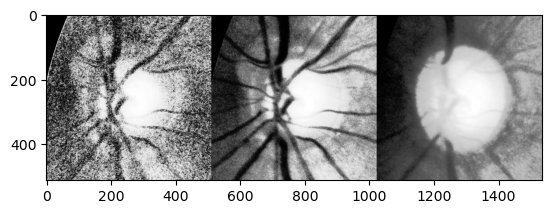

In [177]:
img_=cv2.imread(img_path)
(b,g,r)=cv2.split(img_)
def show_plt(img_list=[b,g,r]):
    """ 图像显示。传参：图像元组 返回值：无 """
    out_imgs=np.hstack(tuple(img_list))
    out_imgs = cv2.cvtColor(out_imgs,cv2.COLOR_RGBA2BGR)
    plt.imshow(out_imgs)
def show_tuple(method_,imgs_tuple=(b,g,r)):
    """ 显示处理后的图像。传参：图像处理方法；
        返回值：图像元组。
    """
    img_tuple=list()
    for x_ in imgs_tuple:
        img_tuple.append(method_(x_))
    show_plt(tuple(img_tuple))
    return img_tuple
def equalizeH(img):
    out_=cv2.equalizeHist(img)
    return out_
oq_=show_tuple(equalizeH,imgs_tuple=(b, g, r))
eq_img_=cv2.merge(oq_)


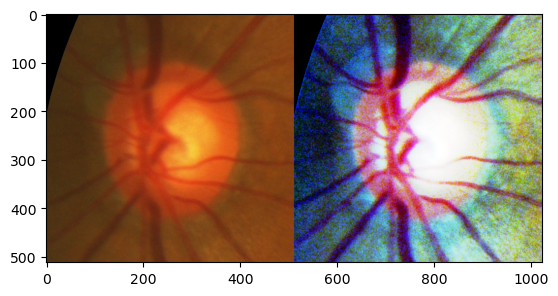

In [178]:
eq_img_=cv2.merge(oq_)
show_plt((img_,eq_img_,))

In [179]:
# image=Image.open(img_path)
image=Image.fromarray(cv2.cvtColor(img_,cv2.COLOR_BGR2RGB))  
# image=Image.fromarray(cv2.cvtColor(cv2.merge([r,r,r]),cv2.COLOR_BGR2RGB))  
color_enhance=color_ImageEnhance(contrast_ImageEnhance(image))
brightness_enhance=brightness_ImageEnhance(image)
contrast_enhance=contrast_ImageEnhance(image)
sharpness_enhance=sharpness_ImageEnhance(image)
r_,g_,b_=color_enhance.split()


In [180]:
r_c,g_c,b_c=sharpness_enhance.split()

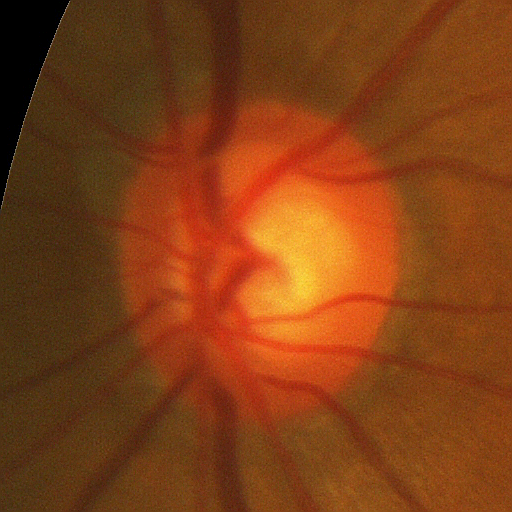

In [208]:
sharpness_enhance

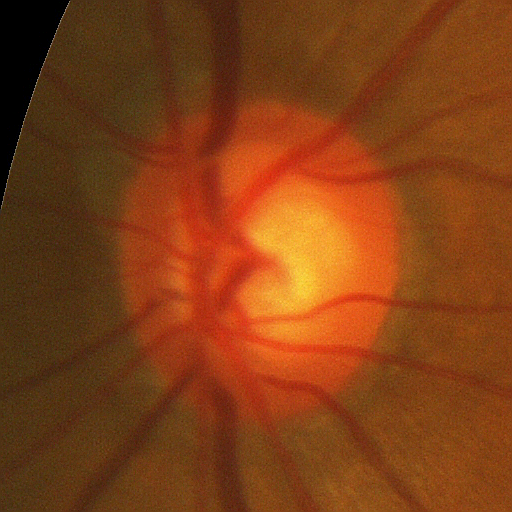

In [182]:
sharpness_enhance

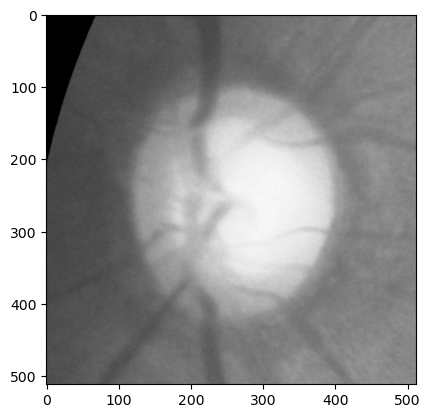

In [183]:
show_plt((r,))

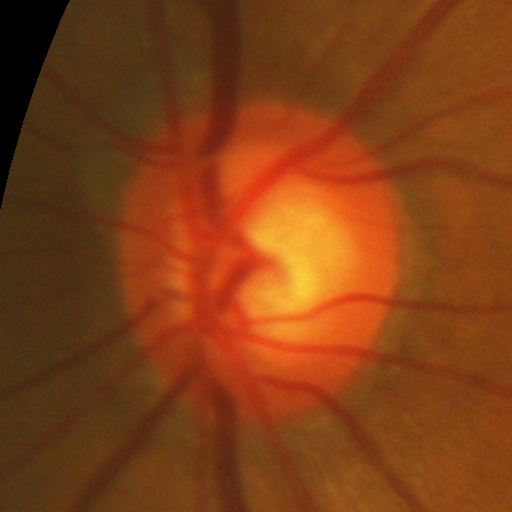

In [184]:
image

In [202]:
def kmeans(roi):
    # K-Means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    X = roi.reshape((-1, 1))
    X = np.float32(X)
    _,labels,centers = cv2.kmeans(X,2,None,criteria,2,flags)

    centers[labels[0]]=[0]
    centers = np.uint8(centers)
    res= centers[labels.flatten()]
    res2 = res.reshape((roi.shape))
    return res2
r_kmeans=kmeans(np.asarray(r_c))

In [203]:
r_kmeans.shape

(512, 512)

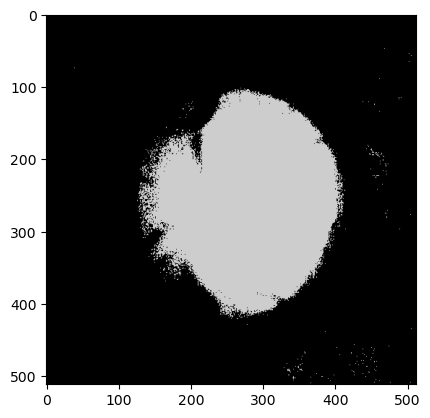

In [204]:

plt.imshow(cv2.cvtColor(r_kmeans,cv2.COLOR_RGBA2BGR))

In [205]:
# # 霍夫曼圆形拟合
# def HoughCircles_trans(img):
#     HoughCircles_img=img.copy()
#     circle1 = cv2.HoughCircles(HoughCircles_img, cv2.HOUGH_GRADIENT, 1, 3000, param1=200, param2=0.9, minRadius=100, maxRadius=256)  #把半径范围缩小点，检测内圆，瞳孔
#     # print(circle1.shape)
#     circles = circle1[0, :, :]  # 提取为二维
#     circles = np.uint16(np.around(circles))  # 四舍五入，取整
#     # show_plt((circles,))
#     return circles[0]
# # print(f"info_circle{info_circle}")
# # 得到mask
# info_circle=HoughCircles_trans(r_kmeans)

# xxx__=cv2.circle(r_kmeans.copy(), (info_circle[0], info_circle[1]), info_circle[2]+50, 180, -1)  # 画圆
# show_plt((xxx__,))

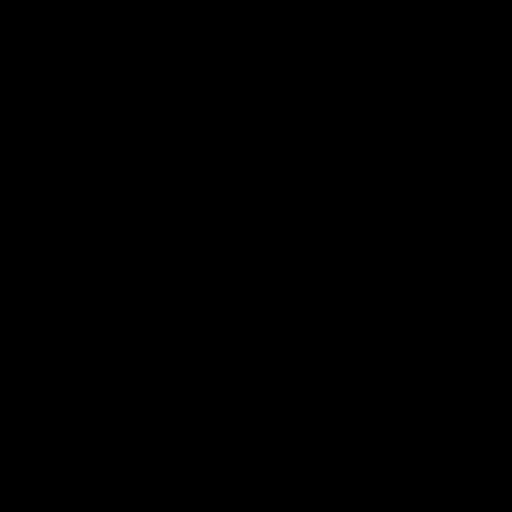

In [206]:
b_

In [207]:
HoughCircles_img = np.asarray(color_enhance)
b_1,g_1,r_1= cv2.split(HoughCircles_img)
circle1 = cv2.HoughCircles(r_1, cv2.HOUGH_GRADIENT, 1, 3000, param1=200, param2=0.9, minRadius=100, maxRadius=256)  #把半径范围缩小点，检测内圆，瞳孔
# print(circle1.shape)
circles = circle1[0, :, :]  # 提取为二维
circles = np.uint16(np.around(circles))
info_circle=circles[0]

TypeError: 'NoneType' object is not subscriptable

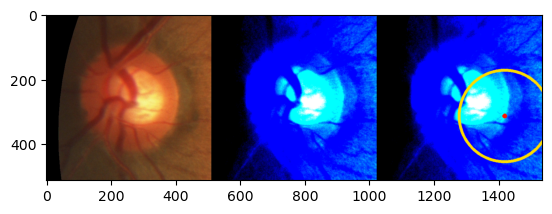

In [ ]:
xxx__=cv2.circle(HoughCircles_img.copy(), (info_circle[0], info_circle[1]), info_circle[2]+20, (0,220,255), 7)  # 画圆
xxx__=cv2.circle(xxx__, (info_circle[0], info_circle[1]), 3, (0,20,255), 7)  # 画圆
xxr_1=cv2.equalizeHist(r_1)
show_plt((img_,HoughCircles_img,xxx__))

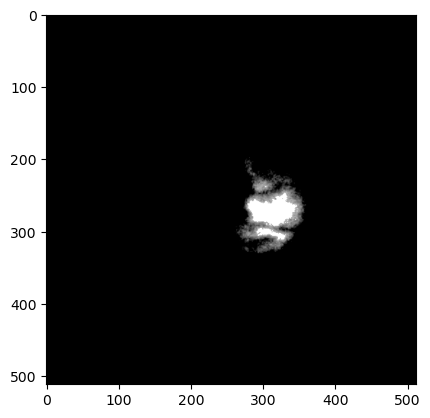

In [ ]:
show_plt((xxr_1,))